# Titanic
1.Import Necessary Libraries<br>
2.Read In and Explore the Data<br>
3.Data Analysis<br>
4.Data Visualization<br>
5.Cleaning Data<br>
6.Choosing the Best Model<br>
7.Creating Submission File<br>

In [1]:
#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('gender_submission.csv')

In [3]:
train.shape, test.shape, submit.shape

((891, 12), (418, 11), (418, 2))

In [4]:
train.columns, test.columns, submit.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Survived'], dtype='object'))

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Analysis

### Explore data

- PassengerId : 승객 고유 번호
- Survived : 1(생존) / 0(죽음)
- Pclass : 티켓 클래스
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 배우자 수 총합
- Parch : 함께 탑승한 부모, 자식 수 총합
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 객실 번호
- Embarked : 탑승지(탑승 항구)

### Method	Description
- count() : 각 컬럼의 개체수
- sum() : 값의 합계
- mean() : 값의 평균 값 리턴
- median() : 값의 중간 값 리턴
- mode() : 최빈수 구하기 (가장 많이 관측되는 수 구하기)
- std() : 값들의 표준편차 리턴
- min() : 값의 최소값 리턴
- max() : 값의 최대값 리턴
- abs() : 절대값 
- describe() : 데이터에 대한 요약 리턴

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#긱 feature가 가진 통계치들을 반환
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Wheadon, Mr. Edward H",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

결측값(missing value)을 통해 Age features는 20%, Cabin feature는 80%의 결측값이 존재함을 알 수 있다.

## EDA(Explorator Data Analysis)
### Data Visualization
<br>

숨겨진 사실을 찾기 위해 적절한 시각화가 필요하다

##### value_counts의 속성
- normalize=True  : 유일 값 별 상대적 비율

### pclass

pclass에 따른 생존률의 차이를 알아보기
- groupby() : 같은 값을 하나로 묶어 통계 또는 집계 결과를 얻기 위해 사용<br>(집단, 그룹별로 데이터를 집계)
    - as_index=True : 인덱스로 사용하고 싶을 경우 사용 <br>ex) df.groupby('city').mean()<br>ex) df.groupby(['city', 'fruits'], as_index=False).mean()
<br>
<br>
- pd.crosstab(index, columns) : 교차표 만들기
    - margins=True : 교차표의 행 합, 열 합 추가하기

In [13]:
#count of pclass
train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
#number of survivors of pclass
train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
pd.crosstab(train['Pclass'], train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [16]:
#survival rate of pclass
#train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

In [17]:
#train['Survived'][train['Pclass'] == 1].value_counts()

Percentage of pclass 1 who survived :  62.96296296296296
Percentage of pclass 2 who survived :  47.28260869565217
Percentage of pclass 3 who survived :  24.236252545824847


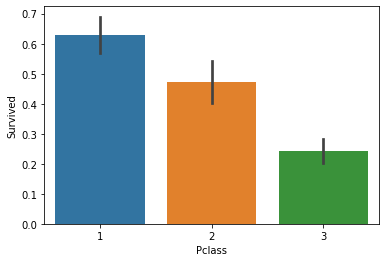

In [18]:
#data visualization - pclass
sns.barplot(x='Pclass', y='Survived', data=train)
print("Percentage of pclass 1 who survived : ", 
      train['Survived'][train['Pclass'] == 1].value_counts(normalize=True)[1]*100)
print("Percentage of pclass 2 who survived : ", 
      train['Survived'][train['Pclass'] == 2].value_counts(normalize=True)[1]*100)
print("Percentage of pclass 3 who survived : ", 
      train['Survived'][train['Pclass'] == 3].value_counts(normalize=True)[1]*100)

### sex

The total people who survived :  342
Percentage of female who survived :  74.20382165605095
Percentage of male who survived :  18.890814558058924


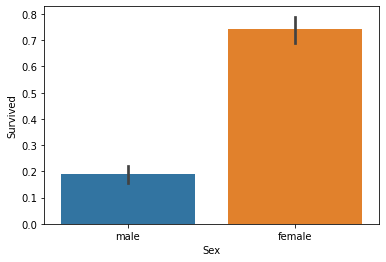

In [19]:
#data visualization - sex
sns.barplot(x="Sex", y="Survived",data=train)

print("The total people who survived : ", train['Survived'].value_counts()[1])
print("Percentage of female who survived : ", 
      train['Survived'][train['Sex'] == 'female'].value_counts(normalize=True)[1]*100)
print("Percentage of male who survived : ", 
      train['Survived'][train['Sex'] == 'male'].value_counts(normalize=True)[1] * 100)

### age

In [20]:
print("older people : {:.1f} years".format(train['Age'].max()))
print("young people : {:.1f} years".format(train['Age'].min()))
print("average of people' age : {:.1f} years".format(train['Age'].mean()))

older people : 80.0 years
young people : 0.4 years
average of people' age : 29.7 years


- sns.kdeplot : 커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 분포 곡선으로 시각화함.

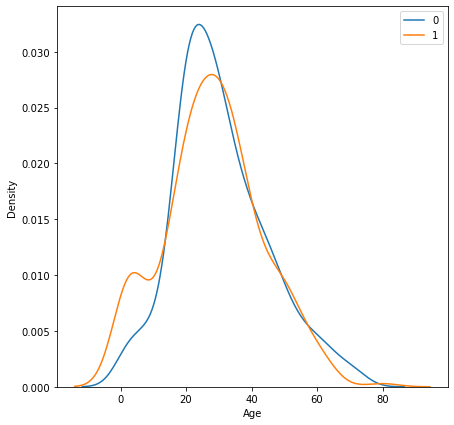

In [21]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax)
sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax)
plt.legend(train['Survived'])
plt.show()

대략 15세 미만 사람들의 생존률이 높다는 것을 알 수 있다.

Text(0.5, 0, 'age')

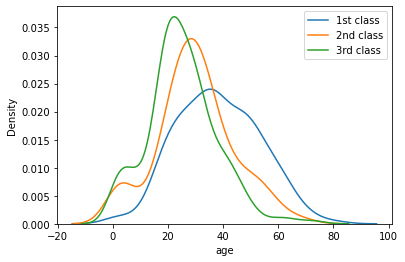

In [22]:
#age with pclass
sns.kdeplot(train[train['Pclass'] == 1]['Age'])
sns.kdeplot(train[train['Pclass'] == 2]['Age'])
sns.kdeplot(train[train['Pclass'] == 3]['Age'])

plt.legend(['1st class','2nd class', '3rd class'])
plt.xlabel('age')

클래스가 높을수록 나이 연령대가 높다는 것을 알 수 있다.<br><br>


나이대가 높아질 수록 생존률은 얼마인지 알아보자

Text(0, 0.5, 'Survival rate')

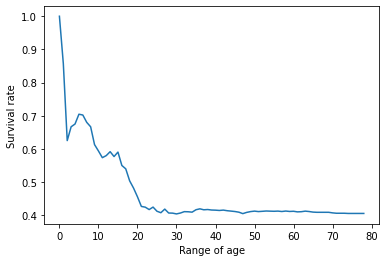

In [23]:
#cumulative survival rate
sur_rate = []
for i in range(1,80) : 
    sur_rate.append(train[train['Age'] < i]['Survived'].sum()
                    /train[train['Age'] < i]['Survived'].count())
    
plt.figure()
plt.plot(sur_rate)
plt.xlabel('Range of age')
plt.ylabel('Survival rate')

나이가 어릴수록 생존률이 높다는 것을 알 수 있다.

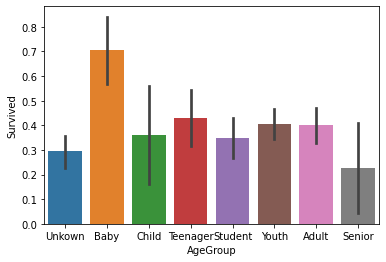

In [24]:
#data visualization - Age
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] #기준점 리스트
labels = ['Unkown','Baby','Child','Teenager','Student','Youth','Adult','Senior']

#pd.cut()을 사용해서 값에 따라 구간을 나눌 수 있다.
train['AgeGroup'] = pd.cut(train['Age'], bins, labels=labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels=labels)

sns.barplot(x='AgeGroup', y='Survived', data=train)
plt.show()

baby 나이 구간이 다른 나이 구간들보다 생존확률이 높다.

### embarked

In [25]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
print("count of S : ", train[train['Embarked'] == 'S'].shape[0])
print("count of C : ", train[train['Embarked'] == 'C'].shape[0])
print("count of Q : ", train[train['Embarked'] == 'Q'].shape[0])

count of S :  644
count of C :  168
count of Q :  77


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

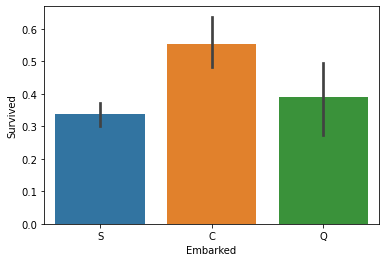

In [27]:
sns.barplot(x='Embarked', y='Survived', data=train)

탑승한 곳에 따라 생존률 차이가 많이 보이지 않아 다른 속성과도 상관관계를 알아보자.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

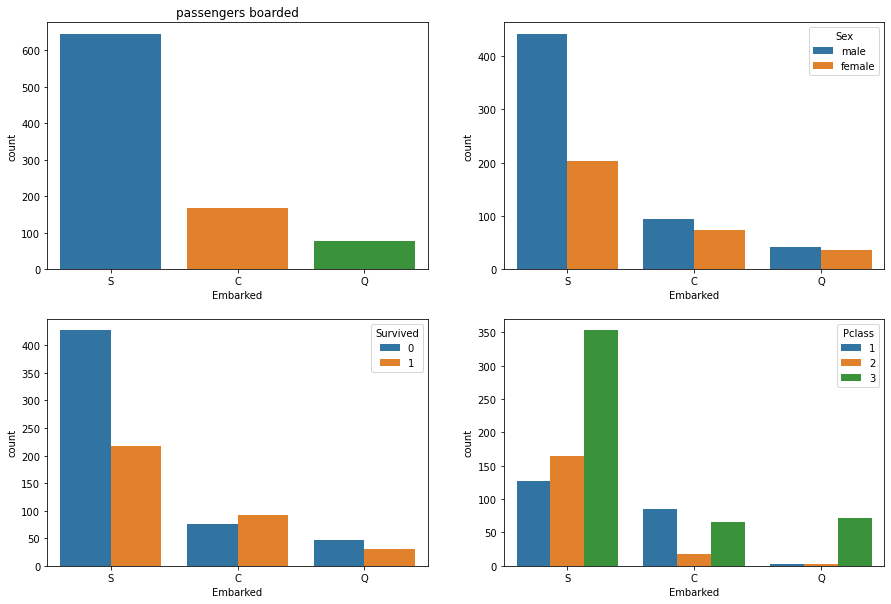

In [28]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot(x='Embarked', data=train, ax=ax[0,0])  
ax[0,0].set_title('passengers boarded')
sns.countplot(x='Embarked', data=train, ax=ax[0,1], hue='Sex')  #hue는 그 컬럼 기준으로 데이터를 나눈다.
sns.countplot(x='Embarked', data=train, ax=ax[1,0], hue='Survived')
sns.countplot(x='Embarked', data=train, ax=ax[1,1], hue='Pclass')

- figure1 : 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승했다.<br>
- figure2 : S는 남자가 더 많지만, C와 Q는 남녀 비율이 비슷하다.<br>
- figure3 : S의 경우 생존확률이 낮다는 것을 알 수 있다.<br>
- figure4 : C가 생존확률이 높은 건 높은 클래스 사람들이 많이 타서 그렇고, S가 생존확률이 낮은 이유는 낮은 클래스 사람들이 많기 때문이다.

### sibsp

Percentage of SibSp 0 who survived :  34.53947368421053
Percentage of SibSp 1 who survived :  53.588516746411486
Percentage of SibSp 2 who survived :  46.42857142857143


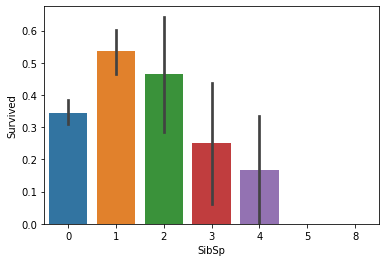

In [29]:
#data visualization - SibSp
sns.barplot(x='SibSp', y='Survived', data=train)
print("Percentage of SibSp 0 who survived : ", 
      train['Survived'][train['SibSp'] == 0].value_counts(normalize=True)[1]*100)
print("Percentage of SibSp 1 who survived : ", 
      train['Survived'][train['SibSp'] == 1].value_counts(normalize=True)[1]*100)
print("Percentage of SibSp 2 who survived : ", 
      train['Survived'][train['SibSp'] == 2].value_counts(normalize=True)[1]*100)

많은 수의 형제자매나 배우자와 함께 탑승한 사람의 경우 생존확률이 낮다.<br>
but, 형제자매나 배우자와 함께 탑승하지 않은 사람은 1-2명인 경우보다 생존확률이 낮다.

### parch

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

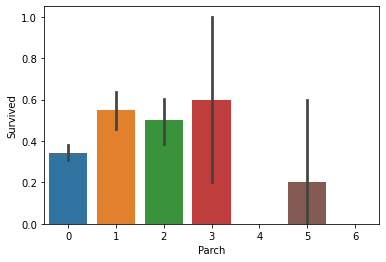

In [30]:
#data visualization - Parch
sns.barplot(x='Parch', y='Survived', data=train)

4명 미만의 부모나 자식과 함께 탑승한 사람은 4명 이상인 사람보다 생존 확률이 높다.<br>
but, 혼자 탑승한 사람은 1-3명과 함께 탑승한 사람보다 생존확률이 낮다.

### ticket

In [31]:
train['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
347088      6
3101295     6
           ..
248723      1
330958      1
371060      1
335677      1
2680        1
Name: Ticket, Length: 681, dtype: int64

ticket의 종류는 매우 다양하여 생존에 영향을 미칠 중요한 정보를 얻어내기 어렵다

### fare

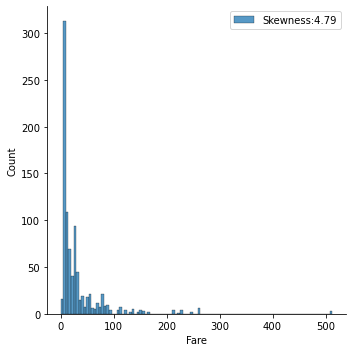

In [32]:
sns.displot(train['Fare'], label='Skewness:{:.2f}'.format(train['Fare'].skew()))
plt.legend(loc='best')

특이하게 test set에 Fare feature에 NaN이 하나 존재하는 것을 확인할 수 있다. <br>
NaN 값은 평균값으로 대체해준다.

In [33]:
#test.Fare.isnull() #test['Fare'].isnull()

In [34]:
#replace NaN value with average value
test.loc[test.Fare.isnull(), 'Fare'] = test['Fare'].mean()

#lambda를 이용해 log value 반환
train['Fare'] = train['Fare'].map(lambda i:np.log(i) if i>0 else 0) 
test['Fare'] = test['Fare'].map(lambda i:np.log(i) if i>0 else 0) 

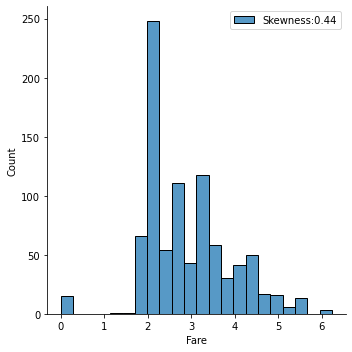

In [35]:
sns.displot(train['Fare'], label='Skewness:{:.2f}'.format(train['Fare'].skew()))
plt.legend(loc='best')

log value로 반환하니 비대칭성이 줄어든 것을 확인할 수 있다.<br>
이런 작업을 통해 모델의 성능을 높이는 것을 <strong>Feature Engineering</strong> 라고 한다. 

### cabin

Percentage of CabinBool 0 who survived :  29.985443959243085
Percentage of CabinBool 1 who survived :  66.66666666666666


<AxesSubplot:xlabel='CabinBool', ylabel='Survived'>

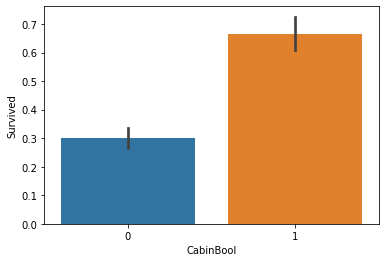

In [36]:
#data visualization - Cabin
#astype() 메서드를 사용하면 배열에서 dtype을 바꿀 수 있다.

#실측값을 astype으로 true/false를 각각 1/0으로 바꿈.
train['CabinBool'] = train['Cabin'].notnull().astype('int')
test['CabinBool'] = test['Cabin'].notnull().astype('int')

print("Percentage of CabinBool 0 who survived : ", #False 
      train['Survived'][train['CabinBool'] == 0].value_counts(normalize=True)[1]*100)
print("Percentage of CabinBool 1 who survived : ", #True
      train['Survived'][train['CabinBool'] == 1].value_counts(normalize=True)[1]*100)

sns.barplot(x='CabinBool', y='Survived', data=train)

객실 번호를 가지고 있는 사람 살아날 가능성이 높다

In [37]:
train['Cabin'].isnull().sum()/train.shape[0]

0.7710437710437711

cabin feature는 NaN이 80%를 차지하고 있으므로, 생존에 영향을 미칠 중요한 정보를 얻어내기 어렵다

#### Predictions
- female이 male보다 살아날 가능성이 더 높다.
- 높은 클래스를 가진 사람은 살아날 가능성이 높다.
- 형제자매가 많은 사람은 살아날 가능성이 낮다. 또한, 형제자매가 없는 사람은 형제자매가 한-두명 있는 사람 보다 살아날 가능성이 낮다.
- 부모나 자식이 4명보다 작은 사람들은 부모/자식이 4명이상인 사람보다 살아날 가능성이 높다. 그리고 혼자 여행한 사람이 부모/자식이 1-3명 있는 사람보다 살아날 가능성이 작다.

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,Youth,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,Youth,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,Youth,0


In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.057860,NaN,Q,Youth,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,1.945910,NaN,S,Adult,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.270836,NaN,Q,Senior,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.159003,NaN,S,Youth,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.508582,NaN,S,Student,0


## Cleaning Data

- cabin feature : 결측값이 많이 사용하기 어려움.
- ticket feature : 유용한 정보를 얻을 수 없어 삭제함.

결측값(missing value)을 통해 Cabin은 사용하기 어려운 것을 확인할 수 있다.<br>그러므로 cabin 값을 삭제 할 것이다.

In [40]:
#drop the Cabin feature
train = train.drop('Cabin',axis=1)
test = test.drop('Cabin',axis=1)

In [41]:
#drop the ticket feature
train = train.drop('Ticket',axis=1)
test = test.drop('Ticket',axis=1)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,S,Youth,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,S,Youth,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,S,Youth,0


### embarked feature

In [43]:
print("count of S : ", train[train['Embarked'] == 'S'].shape[0])
print("count of C : ", train[train['Embarked'] == 'C'].shape[0])
print("count of Q : ", train[train['Embarked'] == 'Q'].shape[0])

count of S :  644
count of C :  168
count of Q :  77


In [44]:
train['Embarked'].isnull().sum()

2

 - Embarked feature의 S의 값이 훨씬 많이므로, 결측값을 s로 채운다.

In [45]:
train = train.fillna({'Embarked':'S'})

In [46]:
train['Embarked'].isnull().sum()

0

### Age feature
embarked와 달리, Age feature의 결측값 비율이 높아 한개의 값으로 채우는 것은 비효울적이다.<br>
대신에 결측값을 예상해보자.
- str.extract() : 원하는 문자열 추출 
<br>

- pd.crosstab(index, columns) : 데이터 재구조화(reshape), 교차표 만들기
    - expand=False : False이면 1개 컬럼에 리스트, True이면 여러 컬럼

In [47]:
combine = [train, test]

#각각 이름에 대한 title을 추출하기 (여기서 title은 호칭!)
for data in combine :
    data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


- Capt : 대위,중대장
- Countess : 백작 부인
- Don : 님, 스페인 신사
- Dr : Doctor의 약자로, 박사
- Lady : 여자
- Major : 성년이 된
- Master : 장인, 명인
- Miss : 미혼 여성
- Mlle : 미혼 여성 (=Miss)
- Mme : Madame(마담), 기혼 여성
- Mr : 남자
- Mrs : 기혼 여성
- Ms : 결혼 여부에 관계없이 여성
- Rev : 신부님
- Sir : 님, 씨

In [48]:
#replace various titles with common names
for data in combine : 
    data['Title'] = data['Title'].replace(['Capt','Col',
                'Don','Dr','Dona','Jonkheer','Major','Rev'],'Rare')
    #data['Title'] = data['Title'].replace(['Lady','Countess','Capt','Col',
                #'Don','Dr','Dona','Sir','Jonkheer','Major','Rev'],'Rare')
    data['Title'] = data['Title'].replace(['Countess','Lady','Sir'],'Royal')
    data['Title'] = data['Title'].replace('Mlle','Miss')
    data['Title'] = data['Title'].replace('Mme','Mrs')
    data['Title'] = data['Title'].replace('Ms','Miss')
    
train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [49]:
#각 명칭을 숫자로 단축시킴
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5} #'Royal':6
for data in combine : 
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,S,Student,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,C,Adult,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,S,Youth,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,S,Youth,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,S,Youth,0,1.0


- mode() : 최빈수 구하기 (가장 많이 관측되는 수 구하기)

In [50]:
#train['Title'].isnull().sum()

In [51]:
#fill missing value with mode age group for each title
mr_age = train[train['Title'] == 1]['AgeGroup'].mode()  #Youth
miss_age = train[train['Title'] == 2]['AgeGroup'].mode() #Unkown
mrs_age = train[train['Title'] == 3]['AgeGroup'].mode()  #Adult
master_age = train[train['Title'] == 4]['AgeGroup'].mode()  #Baby
royal_age = train[train['Title'] == 5]['AgeGroup'].mode()  #Adult
rare_age = train[train['Title'] == 6]['AgeGroup'].mode()  #Adult

title_mapping = {1:'Youth', 2:'Unknown', 3:'Adult', 4:'Baby', 5:'Adult', 6:'Adult'}

train = train.fillna({"Age": train["Title"].map(title_mapping)})
test = test.fillna({"Age": test["Title"].map(title_mapping)})

결측값을 각각 맞게 기입했으며, 더 나은 분석을 위해 age도 각 연령대를 수치로 mapping해보자. ??

In [52]:
#reduce the number of each age group
age_mapping = {'Baby':1, 'Child':2, 'Teenager':3,
                'Student':4, 'Youth':5, 'Adult':6, 'Senior':7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,S,4.0,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,C,6.0,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,S,5.0,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,S,5.0,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,S,5.0,0,1.0


In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,S,4.0,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,C,6.0,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,S,5.0,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,S,5.0,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,S,5.0,0,1.0


In [54]:
#drop the age feature
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

### name feature

In [55]:
#더 이상 이름을 사용하지 않으므로 삭제
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### sex feature

In [56]:
#성별을 숫자로 단축시킴
sex_mapping = {'male':0, 'female':1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,1.981001,S,4.0,0,1.0
1,2,1,1,1,1,0,4.266662,C,6.0,1,3.0
2,3,1,3,1,0,0,2.070022,S,5.0,0,2.0
3,4,1,1,1,1,0,3.972177,S,5.0,1,3.0
4,5,0,3,0,0,0,2.085672,S,5.0,0,1.0


### Embarked feature

In [57]:
#탑승지를 숫자로 단축시킴
embarked_mapping = {'S':1, 'C':2, 'Q':3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,1.981001,1,4.0,0,1.0
1,2,1,1,1,1,0,4.266662,2,6.0,1,3.0
2,3,1,3,1,0,0,2.070022,1,5.0,0,2.0
3,4,1,1,1,1,0,3.972177,1,5.0,1,3.0
4,5,0,3,0,0,0,2.085672,1,5.0,0,1.0


### fare feature
필요한지 더 알아보기

In [58]:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,1,4.0,0,1.0
1,2,1,1,1,1,0,2,6.0,1,3.0
2,3,1,3,1,0,0,1,5.0,0,2.0
3,4,1,1,1,1,0,1,5.0,1,3.0
4,5,0,3,0,0,0,1,5.0,0,1.0


In [60]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title
0,892,3,0,0,0,3,5.0,0,1
1,893,3,1,1,0,1,6.0,0,3
2,894,2,0,0,0,3,7.0,0,1
3,895,3,0,0,0,1,5.0,0,1
4,896,3,1,1,1,1,4.0,0,3


## Choosing the Best Model

titanic은 target class가 survived로 0,1로 이루어져 있어 <strong>binary classfication</strong> 문제이다.
<br>

train set에는 survived를 제외한 input을 가지고, 모델을 최적화시켜 각 탑승객(sample)의 생존유무를 판단하는 모델을 만들어낸다. <br>
그 후 모델이 학습하지 않은 test set의 input을 주어 test set의 각 탑승객(sample)의 생존유무를 예측해본다.<br>

먼저 학습에 쓰일 데이터와 target label(survived)를 분리한다.(drop을 사용)<br>

여기서 <strong>validation</strong>을 사용하는 이유는..<br>
보통 train과 test만 언급하지만, 실제 좋은 모델을 만들기 위해 valid set을 따로 만들어 모델 평가를 해보기 위해서다.

##### spliting the train data
딥러닝을 제외하고도 다양한 기계학습과 데이터 분석 툴을 제공하는 scikit-learn 패키지 중 model_selection에는 데이터 분할을 위한 train_test_split 함수가 들어있다.<br>

<strong>train_test_split</strong>을 사용하여 쉽게 train 셋에서 train과 validation을 분리한다.<br>

- test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)

- train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)

- random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)

In [104]:
from sklearn.model_selection import train_test_split

#separate data and target label
X_train = train.drop(['Survived', 'PassengerId', 'AgeGroup'], axis=1)
target_label = train['Survived'].values

x_tr, x_val, y_tr, y_val = train_test_split(X_train, target_label, 
                                            test_size=0.25, random_state=0)

In [105]:
x_tr.shape, x_val.shape, y_tr.shape, y_val.shape

((668, 7), (223, 7), (668,), (223,))

### various testing models
- Logistic Regression
- Naive Bayes
- Support Vector Machines(SVM)
- Decision Tree
- Random Forest
- k-Nearest Neighbor(KNN)

1. 모델 생성
2. fit()으로 모델에 필요한 두가지 변수 전달
3. predict() : X_val 값을 사용하여 학습한 분류기에 y 값을 예측

#### Confusion Matrix and Statistics
- accuracy_score(y_true, y_pred)
- classfication_report(y_true, y_pred)

참고 자료 : https://yamalab.tistory.com/50

### Logistic Regression

In [110]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

#모형 적합 fit model
logistic = LogisticRegression()
fit_logistic = logistic.fit(x_tr, y_tr)

In [111]:
#검정자료 예측 predict test data
pred_logistic = fit_logistic.predict(x_val)

In [112]:
#정오분류표
pd.crosstab(y_val, pred_logistic)

col_0,0,1
row_0,,
0,110,29
1,23,61


In [113]:
#Confusion Matrix and Statistics
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_logistic))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       139
           1       0.68      0.73      0.70        84

    accuracy                           0.77       223
   macro avg       0.75      0.76      0.75       223
weighted avg       0.77      0.77      0.77       223



In [114]:
#예측 결과의 정확성을 계산
from sklearn.metrics import accuracy_score

acc_logistic = round(accuracy_score(pred_logistic, y_val)* 100, 2)
print("accuracy: ", acc_logistic)

accuracy:  76.68


### Gaussian Naive Bayes

In [115]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#fit model
gaussian = GaussianNB()
fit_gaussian = gaussian.fit(x_tr,y_tr)

In [116]:
#predict test data
pred_gaussian = fit_gaussian.predict(x_val)

In [117]:
#정오분류표
pd.crosstab(y_val, pred_gaussian, margins=True)

col_0,0,1,All
row_0,,,
0,101,38,139
1,11,73,84
All,112,111,223


In [118]:
#Confusion Matrix and Statistics
print(classification_report(y_val, pred_gaussian))

acc_gaussian = round(accuracy_score(pred_gaussian, y_val)* 100, 2)
print("accuracy: ", acc_gaussian)

              precision    recall  f1-score   support

           0       0.90      0.73      0.80       139
           1       0.66      0.87      0.75        84

    accuracy                           0.78       223
   macro avg       0.78      0.80      0.78       223
weighted avg       0.81      0.78      0.78       223

accuracy:  78.03


### Support Vector Machines

In [119]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
fit_svc = svc.fit(x_tr, y_tr)

In [120]:
pred_svc = fit_svc.predict(x_val)

In [121]:
#Confusion Matrix and Statistics
print(classification_report(y_val, pred_svc))

acc_svc = round(accuracy_score(pred_svc, y_val)* 100, 2)
print("accuracy: ", acc_svc)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       139
           1       0.77      0.71      0.74        84

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223

accuracy:  81.17


### Decision Tree

In [122]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
fit_decisiontree = decisiontree.fit(x_tr, y_tr)

In [123]:
pred_decisiontree = fit_decisiontree.predict(x_val)

In [124]:
#Confusion Matrix and Statistics
print(classification_report(y_val, pred_decisiontree))

acc_decisiontree = round(accuracy_score(pred_decisiontree, y_val)* 100, 2)
print("accuracy: ", acc_decisiontree)

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       139
           1       0.79      0.60      0.68        84

    accuracy                           0.79       223
   macro avg       0.79      0.75      0.76       223
weighted avg       0.79      0.79      0.78       223

accuracy:  78.92


### Random Forest

In [125]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
fit_randomforest = randomforest.fit(x_tr, y_tr)

In [126]:
pred_randomforest = fit_randomforest.predict(x_val)

In [127]:
#Confusion Matrix and Statistics
print(classification_report(y_val, pred_randomforest))

acc_randomforest = round(accuracy_score(pred_randomforest, y_val)* 100, 2)
print("accuracy: ", acc_randomforest)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       139
           1       0.75      0.69      0.72        84

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223

accuracy:  79.82


### k-Nearest Neighbor(KNN)

In [128]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
fit_knn = knn.fit(x_tr, y_tr)

In [129]:
pred_knn = fit_knn.predict(x_val)

In [130]:
#Confusion Matrix and Statistics
print(classification_report(y_val, pred_knn))

acc_knn = round(accuracy_score(pred_knn, y_val)* 100, 2)
print("accuracy: ", acc_knn)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       139
           1       0.74      0.69      0.72        84

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223

accuracy:  79.37


각 모델의 정확도를 비교해보자.

In [131]:
model = pd.DataFrame({'Model' : ['Logistic Regression', 'Naive Bayes', 
                                 'Support Vector Machines(SVM)','Decision Tree', 
                                 'Random Forest', 'k-Nearest Neighbor(KNN)'], 
                      'Accuracy':[acc_logistic, acc_gaussian, acc_svc, 
                                  acc_decisiontree, acc_randomforest, acc_knn]})

In [132]:
#sort data
model.sort_values(by='Accuracy', ascending=False) #by:정렬한 기준 변수 #내림차순

,Model,Accuracy
2,Support Vector Machines(SVM),81.17
4,Random Forest,79.82
5,k-Nearest Neighbor(KNN),79.37
3,Decision Tree,78.92
1,Naive Bayes,78.03
0,Logistic Regression,76.68


## Creating Submission File

In [137]:
prediction = svc.predict(test.drop(['PassengerId','AgeGroup'], axis=1))

submission = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':prediction})

In [140]:
submission.to_csv('submission.csv', index=False)